# 28.02.24r.
https://auth.mistral.ai/

## Zad.3
Zaimplementuj funkcję eca_step(rule_number, configuration), gdzie rule_number to liczba całkowita od 0 do 255 odpowiada numerowi reguły ECA, configuration to lista cyfr binarnych odpowiadająca stanom konfiguracji początkowej ECA, a wynikiem jest lista cyfr binarnych odpowiadająca stanom konfiguracji powstałe w wyniku zaaplikowania ECA o podanym numerze. Oczywiście lista wynikowa musi mieć tą samą długość co configuration. Przyjmij periodyczne warunki początkowe.

Przykład: eca_step(30, [0,0,0,0,1,0,0]) -> [0,0,0,1,1,1,0]

Podpowiedź: porównaj wyniki jakie otrzymujesz ze stroną https://elife-asu.github.io/wss-modules/modules/1-1d-cellular-automata/

In [2]:
def eca_step(rule_number: int, configuration: list[int]) -> list[int]:
    # Funkcja format(x, '08b') konwertuje numer reguły na 8-bitowy ciąg binarny
    rule_string = format(rule_number, '08b')
    # Na podstawie numeru reguły tworzymy słownik zasad:
    # 1) odwracamy rule_string
    # 2) i-ty bit odwróconego rule_string to sąsiedztwo w formacie (i, '03b')
    rules = {format(i, '03b'): rule_string[::-1][i] for i in range(8)}
    # print(rules) # można podejrzeć słownik reguł

    # Dodajemy warunki brzegowe do konfiguracji
    extended_config = configuration[-1:] + configuration + configuration[:1]

    # Zastosowanie reguł ECA do konfiguracji:
    # w pętli łączymy sąsiednie trzy bity i używamy jako kluczy do słownika
    # wyszukujemy klucz w słowniku rules i dodajemy odpowiednią wartość do listy
    new_configuration = [int(rules[''.join(map(str, extended_config[i:i+3]))]) for i in range(len(configuration))]

    return new_configuration


In [3]:
eca_step(30, [0,0,0,0,1,0,0])

[0, 0, 0, 1, 1, 1, 0]

## Zad.4
W oparciu o stworzoną wcześniej funkcję eca_step(rule_number,configuration) zaimplementuj funkcję eca_steps(rule_number, configuration, steps), która dla zadanego numeru reguły ECA (rule_number) i zadanego warunku początkowego (configuration) wygeneruje zadaną liczbę (steps) kolejnych konfiguracji tworzących diagram czasoprzestrzenny.

Przykład:

eca_steps(30, [0,0,0,0,1,0,0], 3) -> [[0,0,0,1,1,1,0], [0,0,1,1,0,0,1], [1,1,1,0,1,1,1]]

In [4]:
# Sposób pierwszy
def eca_steps(rule_number: int, configuration: list[int], steps: int) -> list[list[int]]:
    rule_string = format(rule_number, '08b')
    rules = {format(i, '03b'): rule_string[::-1][i] for i in range(8)}
    # Tworzymy listę do której dodamy kolejne konfiguracje
    configurations = []
    # W pętli liczymy kolejne konfiguracje, tak jak w eca_step()
    for _ in range(steps):
        extended_config = configuration[-1:] + configuration + configuration[:1]
        new_configuration = [int(rules[''.join(map(str, extended_config[i:i+3]))]) for i in range(len(configuration))]
        configurations.append(new_configuration)
        configuration = new_configuration

    return configurations


In [5]:
eca_steps(30, [1,0,0,0,1,0,0], 3)

[[1, 1, 0, 1, 1, 1, 1], [0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0]]

In [6]:
# Sposób drugi - wywołując wcześniej napisaną funkcję eca_step()
def eca_steps2(rule_number: int, configuration: list[int], steps: int) -> list[list[int]]:
    configurations = [configuration]
    for _ in range(steps):
        # Wybieramy poprzednią konfigurację
        last_configuration = configurations[-1]
        # Wywołujemy dla niej funkcję eca_step()
        next_configuration = eca_step(rule_number, last_configuration)
        # Dodajemy nową konfigurację do listy
        configurations.append(next_configuration)

    return configurations


In [7]:
eca_steps2(30, [0,0,0,0,1,0,0], 3)

[[0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0],
 [0, 0, 1, 1, 0, 0, 1],
 [1, 1, 1, 0, 1, 1, 1]]

## Zad.5
Za pomocą matplotlib (lub podobnej, wybranej biblioteki) zaimplementuj funkcję eca_visualize(rule_number, configuration, steps), która pozwoli narysować diagram czasoprzestrzenny ECA o zadanym numerze, dla zadanej konfiguracji początkowej i dla zadanej liczby kroków czasowych.

Podpowiedź: możesz spróbować użyć funkcji matplotlib.pyplot.imshow.

Przykład: eca_visualize(150, initial_conf, 64)

In [8]:
import matplotlib.pyplot as plt

def eca_visualize(rule_number, configuration, steps):
    spacetime_field = eca_steps(rule_number, configuration, steps)

    # Przekształcamy pole czasoprzestrzenne na mapę kolorów binarnych
    binary_spacetime_field = [[1 if cell else 0 for cell in row] for row in spacetime_field]

    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_title(f'Space-time Diagram of the ECA {rule_number}', fontsize=15)
    ax.imshow(binary_spacetime_field, cmap='Greys')
    ax.set_xlabel('Cell Index', fontsize=10)
    ax.set_ylabel('Time Step', fontsize=10)
    plt.show()


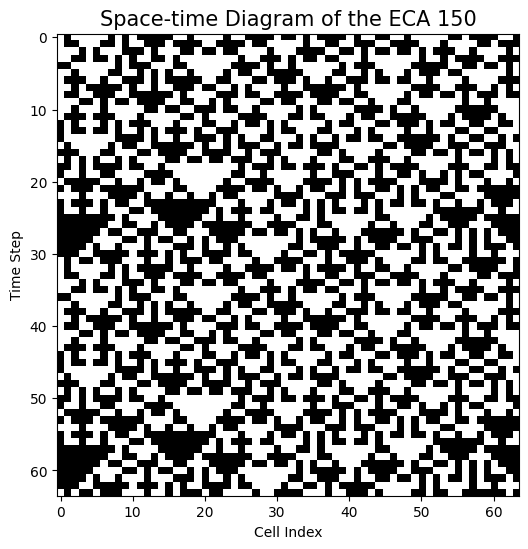

In [9]:
import random
# initial_conf = [1,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,
#                 1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1]
initial_conf = [random.randint(0,1) for _ in range(64)]
eca_visualize(150, initial_conf, 64)

# 6.03.24r., 13.03.24r.

## Zad.6*
Przeprowadź swoje badania dynamiki ECA na podstawie oceny diagramów czasoprzestrzennych i spróbuj zreplikować klasyfikację Wolframa lub zaproponować swoją podobną.
Pomysły warte rozważania (ale możesz zaproponować też swój):
- Jak na zachowanie danego ECA wpływa zmiana stanu pojedynczej komórki w
warunku początkowym (czy wpływa czy nie wpływa i jak bardzo)?
- Występowanie symetrii, powtarzalnych elementów, wzorców?
- Zmiana częstości występowania 0 i 1 w konfiguracji.
- Zmiana częstości występowania bloków o zadanej długości np. 3 - czyli częstości występowania poszczególnych konfiguracji sąsiedztw.

### Wpływ zmiany stanu pojedynczej komórki w warunku początkowym na zachowanie ECA
Załóżmy, że konfiguracja [0,0,0,0,0,1,0,0,0,0] jest warunkiem początkowym. Niech druga konfiguracja ma zmienioną tylko wartość w pierwszej komórce, czyli [1,0,0,0,0,1,0,0,0,0]. Za pomocą sumy wartości bezwzględnych różnic między odpowiadającymi sobie komórkami w dwóch diagramach czasoprzestzrennych zbadamy jak bardzo się między sobą różnią. Badanie przeprowadzimy dla całych diagramów, wygenerowanych w dziesięciu krokach.

In [10]:
# Wizualizacja
import matplotlib.pyplot as plt

def eca_visualize2(rule_number, configuration1, configuration2, steps):
    spacetime_field1 = eca_steps(rule_number, configuration1, steps)
    spacetime_field2 = eca_steps(rule_number, configuration2, steps)

    # Przekształcamy pole czasoprzestrzenne na mapę kolorów binarnych
    binary_spacetime_field1 = [[1 if cell else 0 for cell in row] for row in spacetime_field1]
    binary_spacetime_field2 = [[1 if cell else 0 for cell in row] for row in spacetime_field2]

    fig, axs = plt.subplots(1, 2, figsize=(12,6)) # Tworzymy dwa subwykresy

    # Wykres dla pierwszej konfiguracji
    axs[0].set_title(f'ECA {rule_number}, {steps} steps - Config 1', fontsize=15)
    axs[0].imshow(binary_spacetime_field1, cmap='Greys')
    axs[0].set_xlabel('Cell Index', fontsize=10)
    axs[0].set_ylabel('Time Step', fontsize=10)

    # Wykres dla drugiej konfiguracji
    axs[1].set_title(f'ECA {rule_number}, {steps} steps - Config 2', fontsize=15)
    axs[1].imshow(binary_spacetime_field2, cmap='Greys')
    axs[1].set_xlabel('Cell Index', fontsize=10)
    axs[1].set_ylabel('Time Step', fontsize=10)

    plt.tight_layout()
    plt.show()


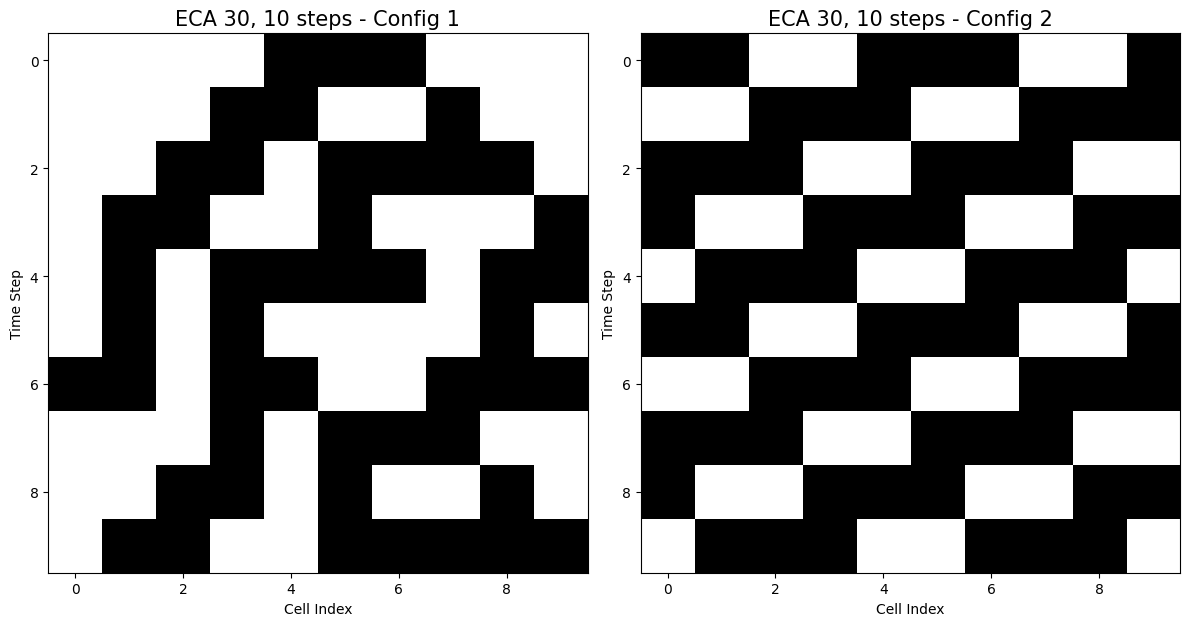

In [11]:
eca_visualize2(30, [0,0,0,0,0,1,0,0,0,0], [1,0,0,0,0,1,0,0,0,0], 10)

Na obrazku po lewej ułożenie czarnych i białych komórek wydaje się być losowe, natomiast kolory na drugim rysunku układają się w pewien wzór.

In [12]:
import numpy as np

# Funkcja wyznaczająca różnicę
def analyze_diff(rule_number, configuration, steps):
    # Generujemy diagram czasoprzestrzenny
    spacetime_field = eca_steps(rule_number, configuration, steps)

    # Analizujemy wpływ zmiany stanu pojedynczej komórki w warunku początkowym
    flipped_configuration = configuration.copy()
    flipped_configuration[0] = 1 - flipped_configuration[0]  # Zmieniamy stan pierwszej komórki
    flipped_spacetime_field = eca_steps(rule_number, flipped_configuration, steps)
    # Obliczamy sumę wartości bezwzględnych różnic między odpowiadającymi sobie komórkami w obu polach
    difference = np.sum(np.abs(np.array(spacetime_field) - np.array(flipped_spacetime_field)))

    return difference

In [13]:
difference = analyze_diff(30, [0,0,0,0,0,1,0,0,0,0], 10)
print(f"Różnica między powyższymi diagramami: {difference}")

Różnica między powyższymi diagramami: 42


Sprawdźmy jak wyglądają różnice dla naszych konfiguracji dla wszystkich reguł.

In [14]:
import random

for rule_number in range(256):
  difference = analyze_diff(rule_number, [0,0,0,0,0,1,0,0,0,0], 10)
  print(f"Różnica w ECA {rule_number}: {difference}")


Różnica w ECA 0: 0
Różnica w ECA 1: 20
Różnica w ECA 2: 10
Różnica w ECA 3: 15
Różnica w ECA 4: 10
Różnica w ECA 5: 15
Różnica w ECA 6: 15
Różnica w ECA 7: 1
Różnica w ECA 8: 0
Różnica w ECA 9: 46
Różnica w ECA 10: 10
Różnica w ECA 11: 20
Różnica w ECA 12: 10
Różnica w ECA 13: 38
Różnica w ECA 14: 20
Różnica w ECA 15: 10
Różnica w ECA 16: 10
Różnica w ECA 17: 15
Różnica w ECA 18: 38
Różnica w ECA 19: 1
Różnica w ECA 20: 15
Różnica w ECA 21: 1
Różnica w ECA 22: 37
Różnica w ECA 23: 0
Różnica w ECA 24: 10
Różnica w ECA 25: 41
Różnica w ECA 26: 36
Różnica w ECA 27: 10
Różnica w ECA 28: 38
Różnica w ECA 29: 10
Różnica w ECA 30: 42
Różnica w ECA 31: 0
Różnica w ECA 32: 0
Różnica w ECA 33: 20
Różnica w ECA 34: 10
Różnica w ECA 35: 15
Różnica w ECA 36: 10
Różnica w ECA 37: 53
Różnica w ECA 38: 15
Różnica w ECA 39: 10
Różnica w ECA 40: 0
Różnica w ECA 41: 41
Różnica w ECA 42: 10
Różnica w ECA 43: 20
Różnica w ECA 44: 10
Różnica w ECA 45: 52
Różnica w ECA 46: 20
Różnica w ECA 47: 19
Różnica w E

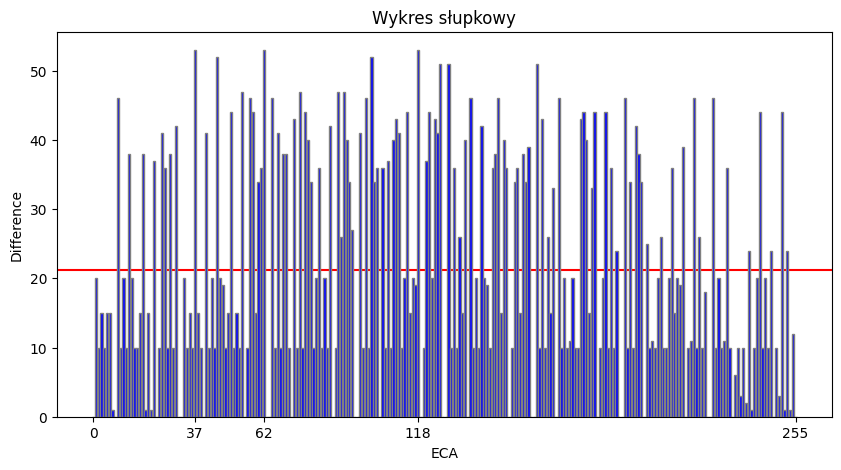

In [15]:
# Wizualizacja
import matplotlib.pyplot as plt

data = [analyze_diff(rule_number, [0,0,0,0,0,1,0,0,0,0], 10) for rule_number in range(256)]
w = [_ for _ in range(256)]
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.bar(x = w, height = data, color='blue', edgecolor='grey', align='center')
max_value = max(data)
indices = [i for i, x in enumerate(data) if x == max_value]
indices.insert(0, 0)
indices.append(255)
ax.set_xticks(indices)
srednia = np.mean(data)
ax.axhline(srednia, xmin=0, xmax=1, color='red', zorder=0.5)
plt.title('Wykres słupkowy')
plt.xlabel('ECA')
plt.ylabel('Difference')
plt.show()


Wykres jest ogólnie nieczytelny, jednak możemy odczytać, że dla naszych konfiguracji reguły 37, 62 i 118 miały największe różnice, a średnia dla wszystkich reguł wynosi około 21.

In [16]:
# Powtórzenie badania 100 razy i uśrednienie wyników
import pandas as pd

d = pd.DataFrame()
l = []
for rule_number in range(256):
  difference = 0
  for i in range(100):
    initial_conf = [random.randint(0,1) for _ in range(10)]
    difference += analyze_diff(rule_number, initial_conf, 10)
  l.append(difference/100)
d['diff'] = l
d

,diff
0,0.00
1,9.80
2,7.50
3,11.50
4,7.70
...,...
251,2.01
252,2.84
253,0.76
254,0.81


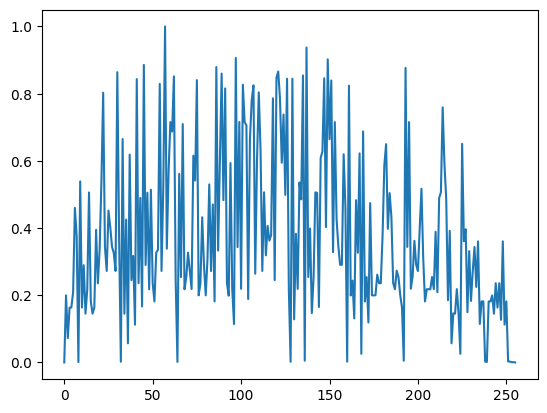

In [41]:
plt.plot(w, d['diff'])

### Występowanie symetrii
Niech\
$1 - x_i = \overline{x_i}$,\
$f_1(x_{i-1},x_i,x_{i+1}) = f(x_{i+1},x_i,x_{i-1})$,\
$f_2(x_{i-1},x_i,x_{i+1}) = \overline{f(\overline{x_{i-1}}, \overline{x_i},\overline{x_{i+1}})}$,\
$f_3(x_{i-1},x_i,x_{i+1}) = \overline{f(\overline{x_{i+1}}, \overline{x_i}, \overline{x_{i-1}})}$.

In [46]:
# Funkcja badająca symetrie
def analyze_symmetry(rule_number, configuration, steps):
    # Generujemy diagram czasoprzestrzenny
    spacetime_field = eca_steps(rule_number, configuration, steps)

    # Definiujemy operacje symetrii
    f_1 = lambda config: config[::-1]  # odbicie
    f_2 = lambda config: [1 - cell for cell in config]  # negacja
    f_3 = lambda config: [1 - cell for cell in config[::-1]]  # odbicie i negacja

    # Sprawdzamy, czy pole czasoprzestrzenne jest symetryczne pod każdą operacją
    is_symmetric_f_1 = all(config == f_1(config) for config in spacetime_field)
    is_symmetric_f_2 = all(config == f_2(config) for config in spacetime_field)
    is_symmetric_f_3 = all(config == f_3(config) for config in spacetime_field)

    # Zwracamy listę wyników
    return [is_symmetric_f_1, is_symmetric_f_2, is_symmetric_f_3]


In [47]:
initial_conf = [random.randint(0,1) for _ in range(10)]
analyze_symmetry(30, initial_conf, 10)

[False, False, False]

In [48]:
l = []
for rule_number in range(256):
    symmetry = [0, 0, 0]
    for i in range(100):
        initial_conf = [random.randint(0,1) for _ in range(10)]
        symmetry_results = analyze_symmetry(rule_number, initial_conf, 10)
        symmetry = [sum(x) for x in zip(symmetry, symmetry_results)]
    l.append([x/100 for x in symmetry])
d['symmetry_f_1'], d['symmetry_f_2'], d['symmetry_f_3'] = zip(*l)
d

,diff,symmetry_f_1,symmetry_f_2,symmetry_f_3
0,0.000000,1.00,0.0,0.0
1,0.199746,0.47,0.0,0.0
2,0.072635,0.14,0.0,0.0
3,0.163428,0.09,0.0,0.0
4,0.163428,0.29,0.0,0.0
...,...,...,...,...
251,0.003087,0.28,0.0,0.0
252,0.002724,0.18,0.0,0.0
253,0.000726,0.08,0.0,0.0
254,0.001090,0.47,0.0,0.0


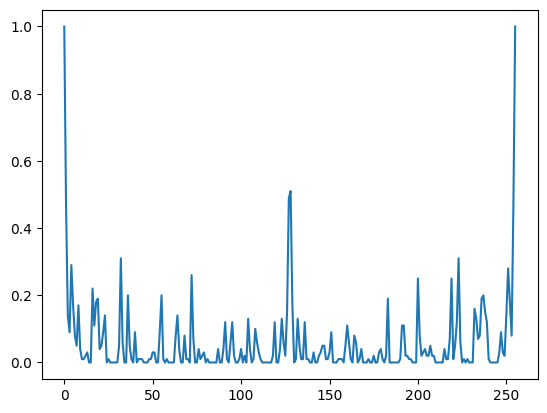

In [49]:
plt.plot(w, d['symmetry_f_1'])

In [ ]:
sum(d['symmetry_f_1']), sum(d['symmetry_f_2']), sum(d['symmetry_f_3'])

(14.59999999999998, 0.0, 2.459999999999999)

Z badania wyszło, że żadna z reguł nie jest symetryczna względem negacji ($f_2$). Zdecydowanie częściej diagramy czasoprzestrzenne są symeryczne po przkształceniu $f_1$ niż po przekształceniu $f_3$.

### Zmiana częstości występowania 0 i 1 w konfiguracji

In [ ]:
import collections
import itertools

def analyze_occurrences(rule_number, configuration, steps):
    spacetime_field = eca_steps(rule_number, configuration, steps)

    # Zliczamy wystąpienia 0 i 1 w spacetime_field
    occurrences = collections.Counter(itertools.chain.from_iterable(spacetime_field))

    return occurrences

In [ ]:
initial_conf = [random.randint(0,1) for _ in range(10)]
analyze_occurrences(30, initial_conf, 10)

Counter({0: 55, 1: 45})

In [ ]:
l = []
for rule_number in range(256):
    occurrences = [0, 0]
    for i in range(100):
        initial_conf = [random.randint(0,1) for _ in range(10)]
        occurrence_results = analyze_occurrences(rule_number, initial_conf, 10)
        occurrences = [sum(x) for x in zip(occurrences, [occurrence_results[0], occurrence_results[1]])]
    l.append([x/100 for x in occurrences])
d['occurrences_0'], d['occurrences_1'] = zip(*l)
d

,diff,symmetry_f_1,symmetry_f_2,symmetry_f_3,occurrences_0,occurrences_1
0,0.00,1.00,0.0,0.0,100.00,0.00
1,7.00,0.40,0.0,0.0,56.10,43.90
2,8.20,0.11,0.0,0.0,87.30,12.70
3,11.50,0.13,0.0,0.0,56.35,43.65
4,7.70,0.25,0.0,0.0,86.90,13.10
...,...,...,...,...,...,...
251,1.77,0.30,0.0,0.0,2.04,97.96
252,3.13,0.14,0.0,0.0,5.76,94.24
253,0.69,0.14,0.0,0.0,1.17,98.83
254,1.13,0.44,0.0,0.0,1.56,98.44


#### Można by zbadać, jak się zmienia częstość występowania 0 i 1 w kolejnych krokach

In [ ]:
def analyze_occurrences_per_step(rule_number, configuration, steps):
    spacetime_field = eca_steps(rule_number, configuration, steps)

    # Zliczamy wystąpienia 0 i 1 dla każdego kroku
    occurrences_per_step = [collections.Counter(step) for step in spacetime_field]

    return occurrences_per_step

initial_conf = [random.randint(0,1) for _ in range(10)]
occurrences_per_step = analyze_occurrences_per_step(30, initial_conf, 10)

for step, occurrences in enumerate(occurrences_per_step):
    print(f"Step {step}: {occurrences}")


Step 0: Counter({1: 6, 0: 4})
Step 1: Counter({0: 6, 1: 4})
Step 2: Counter({1: 6, 0: 4})
Step 3: Counter({0: 6, 1: 4})
Step 4: Counter({1: 8, 0: 2})
Step 5: Counter({0: 8, 1: 2})
Step 6: Counter({0: 6, 1: 4})
Step 7: Counter({0: 6, 1: 4})
Step 8: Counter({1: 7, 0: 3})
Step 9: Counter({0: 7, 1: 3})


In [ ]:
import pandas as pd

def analyze_occurrences_per_step(rule_number, configuration, steps):
    spacetime_field = eca_steps(rule_number, configuration, steps)

    occurrences_per_step = [collections.Counter(step) for step in spacetime_field]
    df = pd.DataFrame(occurrences_per_step)

    return df

In [ ]:
initial_conf = [random.randint(0,1) for _ in range(10)]
analyze_occurrences_per_step(30, initial_conf, 10)

,0,1
0,3,7
1,6,4
2,6,4
3,3,7
4,6,4
5,6,4
6,3,7
7,6,4
8,6,4
9,3,7


In [ ]:
def plot_df(df):
    plt.figure(figsize=(10,6))

    plt.plot(df.index, df[0], label='0')
    plt.plot(df.index, df[1], label='1')

    plt.xlabel('Step')
    plt.ylabel('Occurrences')
    plt.title('Occurrences of 0 and 1 per Step')
    plt.legend()

    plt.show()


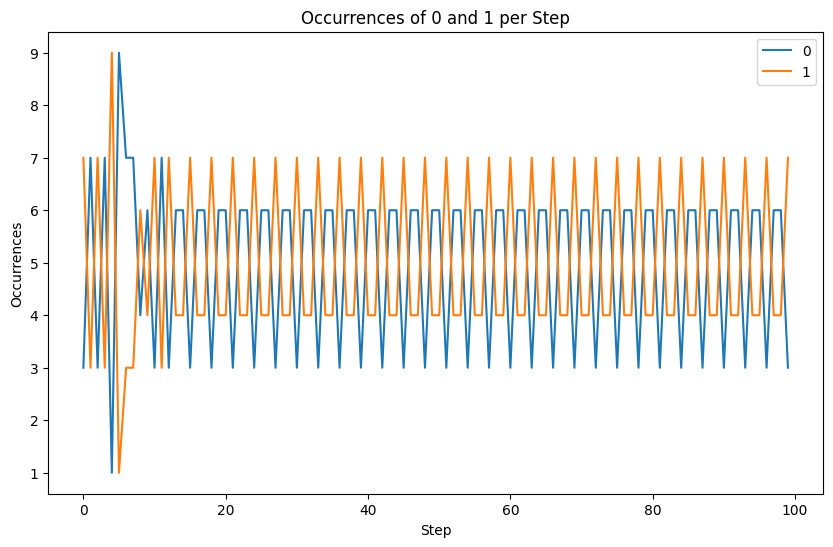

In [ ]:
initial_conf = [random.randint(0,1) for _ in range(10)]
plot_df(analyze_occurrences_per_step(30, initial_conf, 100))

Dla reguły ECA 30 i warunku początkowego o długości 10, po pewnej liczbie kroków zmiana częstości występowania 0 i 1 powtarza się.

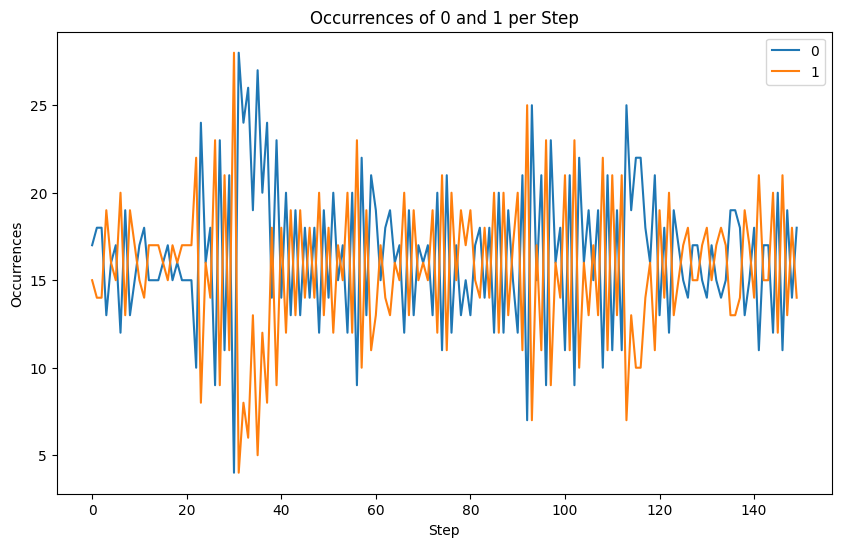

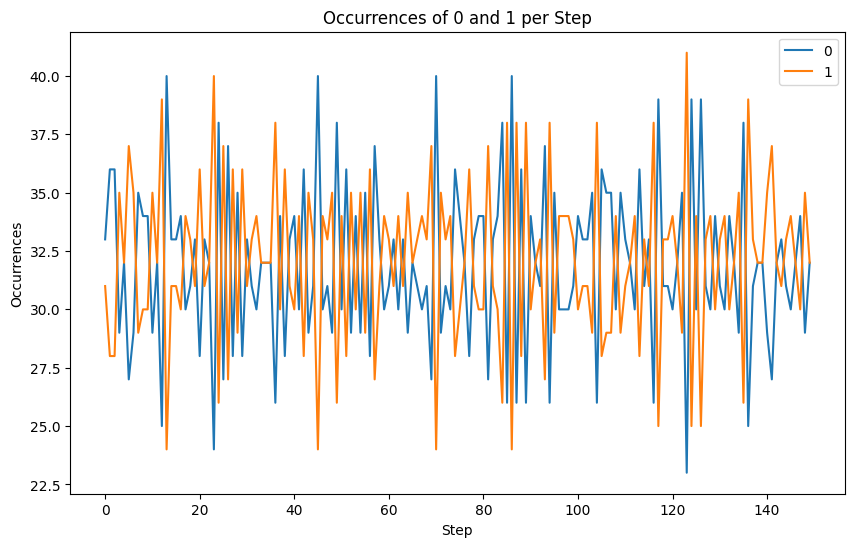

(None, None)

In [ ]:
df32 = analyze_occurrences_per_step(30, [random.randint(0,1) for _ in range(32)], 150)
df64 = analyze_occurrences_per_step(30, [random.randint(0,1) for _ in range(64)], 150)
plot_df(df32), plot_df(df64)

Dla tej samej reguły, ale dłuższej konfiguracji początkowej trudniej "gołym okiem" znaleźć jakiś wzorzec.

### Zmiana częstości występowania bloków o zadanej długości np. 3 - czyli częstości występowania poszczególnych konfiguracji sąsiedztw

Wyznaczamy wszystkie możliwe konfiguracje, a potem zliczamy wystąpienia i liczymy częstość występowania.

In [ ]:
{format(i, '03b'): 0 for i in range(8)}

{'000': 0,
 '001': 0,
 '010': 0,
 '011': 0,
 '100': 0,
 '101': 0,
 '110': 0,
 '111': 0}

In [ ]:
import itertools
import collections

def analyze_block_occurrences(rule_number, configuration, steps, block_size):
    spacetime_field = eca_steps(rule_number, configuration, steps)

    # Tworzymy słownik z wszystkimi możliwymi konfiguracjami bloków
    all_possible_blocks = {tuple(map(int, format(i, '0{}b'.format(block_size)))): 0 for i in range(2**block_size)}

    # Zliczamy wystąpienia każdego bloku o danej wielkości w spacetime_field i aktualizujemy słownik
    for config in spacetime_field:
        for i in range(len(config) - block_size + 1):
            block = tuple(config[i:i+block_size])
            all_possible_blocks[block] += 1

    # Obliczamy całkowitą liczbę bloków
    total_blocks = sum(all_possible_blocks.values())

    # Zwracamy procentowe wystąpienia każdego bloku, zaokrąglone do 2 miejsc po przecinku
    block_percentages = {block: round(count / total_blocks * 100, 2) for block, count in all_possible_blocks.items()}

    return block_percentages


In [ ]:
initial_conf = [random.randint(0,1) for _ in range(10)]
analyze_block_occurrences(30, initial_conf, 10, 3)

{(0, 0, 0): 5.0,
 (0, 0, 1): 8.75,
 (0, 1, 0): 20.0,
 (0, 1, 1): 13.75,
 (1, 0, 0): 8.75,
 (1, 0, 1): 23.75,
 (1, 1, 0): 13.75,
 (1, 1, 1): 6.25}

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_bar(data):
  labels = [str(k) for k in data.keys()]
  values = list(data.values())
  colors = cm.rainbow(np.linspace(0, 1, len(values)))
  plt.figure(figsize=(10,6))
  bars = plt.bar(labels, values, color=colors)
  plt.ylim(0, 3 + max(values))

  for bar in bars:
      yval = bar.get_height()
      plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

  plt.xlabel('Blocks')
  plt.ylabel('Occurrence frequency [%]')
  plt.title('Histogram of Block Occurrences')

  plt.show()


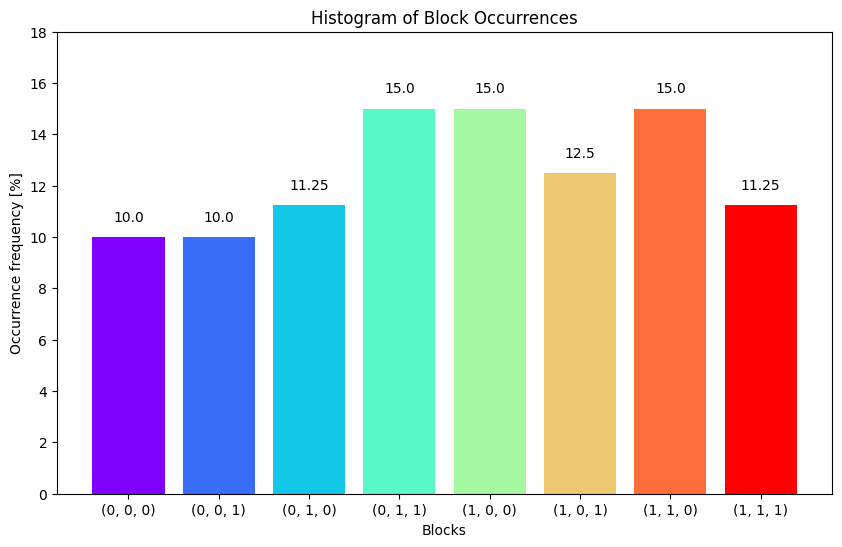

In [ ]:
initial_conf = [random.randint(0,1) for _ in range(10)]
data = analyze_block_occurrences(30, initial_conf, 10, 3)
plot_bar(data)

In [ ]:
l = []
for rule_number in range(256):
    block_occurrences = collections.defaultdict(int)
    for i in range(100):
        initial_conf = [random.randint(0,1) for _ in range(10)]
        block_occurrence_results = analyze_block_occurrences(rule_number, initial_conf, 10, 3)
        for block, count in block_occurrence_results.items():
            block_occurrences[block] += count
    l.append({block: count/100 for block, count in block_occurrences.items()})
d2 = pd.DataFrame(l)
d2

,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
0,100.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000
1,43.3125,6.6875,2.250,4.4375,6.6875,0.0000,4.2500,32.3750
2,58.9000,13.7000,13.700,0.0000,13.7000,0.0000,0.0000,0.0000
3,31.0500,12.5875,5.000,7.6000,12.5875,0.0000,7.6000,23.5750
4,62.1250,10.7500,13.625,0.0000,10.0000,3.5000,0.0000,0.0000
...,...,...,...,...,...,...,...,...
251,0.0000,0.0000,0.300,1.0875,0.0000,1.3875,1.1375,96.0875
252,1.5125,1.4500,0.000,2.8250,1.3750,1.3500,2.7000,88.7875
253,0.0000,0.0000,0.000,1.2500,0.0000,1.2500,1.2125,96.2875
254,0.3750,0.3625,0.000,0.7625,0.4375,0.4125,0.8875,96.7625


Możemy zauważyć, że niektóre konfiguracje wcale nie występują dla niektórych reguł. Dla ECA 0 i ECA 255 jest to oczywiste.

Na przykład dla reguły ECA 1, konfiguracja (1, 0, 1) ani razu nie wystąpiła:

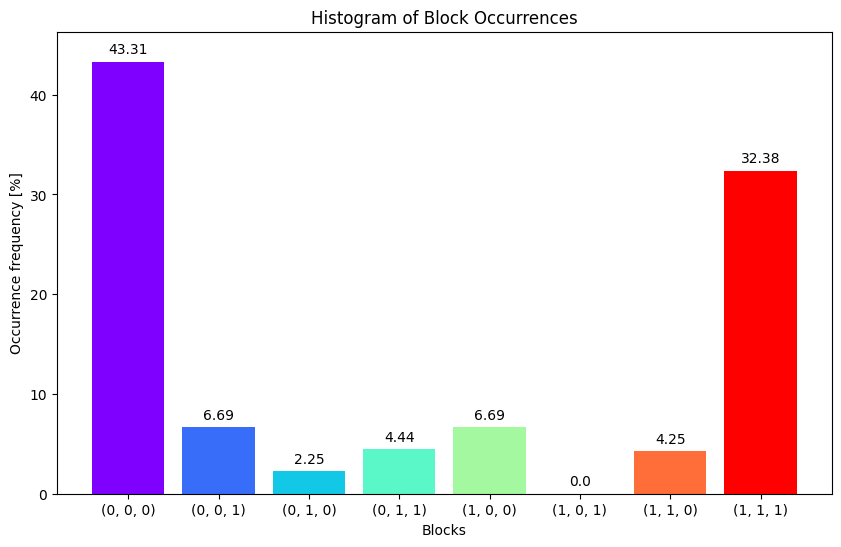

In [ ]:
def plot_bar_df(df, row):
    # Przygotowanie danych do wykresu
    labels = [str(i) for i in df.columns]
    values = df.loc[row].values

    # Utworzenie mapy kolorów
    colors = cm.rainbow(np.linspace(0, 1, len(values)))

    plt.figure(figsize=(10,6))
    bars = plt.bar(labels, values, color=colors)
    plt.ylim(0, 3 + max(values))

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

    plt.xlabel('Blocks')
    plt.ylabel('Occurrence frequency [%]')
    plt.title('Histogram of Block Occurrences')

    plt.show()

plot_bar_df(d2, 1)

*Bloki o długości 2:

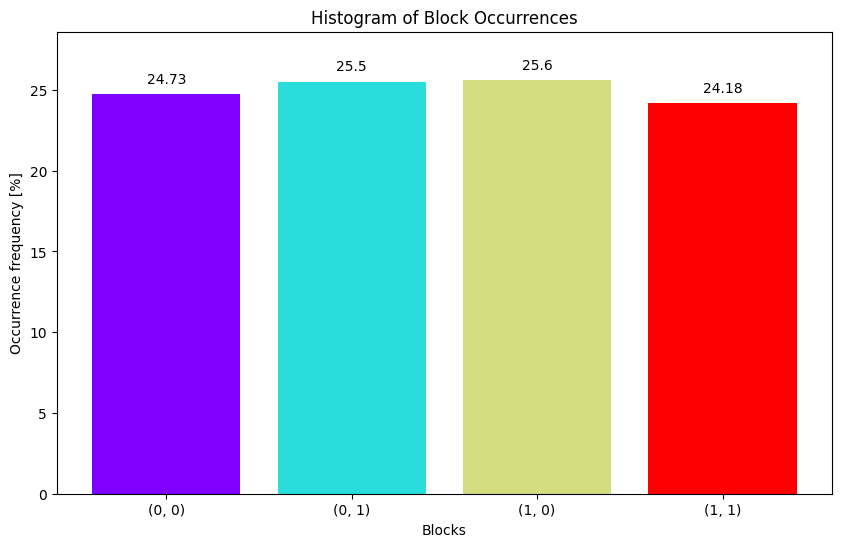

In [ ]:
initial_conf = [random.randint(0,1) for _ in range(64)]
plot_bar(analyze_block_occurrences(30, initial_conf, 64, 2))

## *Implementacja za pomocą numpy

In [ ]:
import numpy as np

lut = np.array([1,0,1,0,1,0,1,0])
x = np.array([1,0,1,0,0,0,0,0]) # initial config

def eca_evolve(lut, x):
  conf = np.stack([np.roll(x, 1), x, np.roll(x, -1)])
  index = conf[0] * 4 + conf[1] * 2 + conf[2]
  return lut[index] # result

In [ ]:
eca_evolve(lut, x)

array([1, 0, 1, 1, 1, 1, 1, 0])